### Problem Defnition
Campaign for selling personal loans.

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.
The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

### Abstract

The main goal of this report is

1. Read the column description and ensure you understand each attribute well 
2. Study the data distribution in each attribute, share your findings.
3. Get the target column distribution. Your comments 
4. Split the data into training and test set in the ratio of 70:30 respectively 
5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans
6. Print the confusion matrix for all the above models
7. Give your reasoning on which is the best model in this case and why it performs better?

### Methodology

Description of data 

Preprocess data 

Visualize data 

Build a model 

Check Assumptions

Compare different classification models (Logistic, K-NN and Naïve Bayes)

### Description of data
Name of the data: Bank Personal Loan Modeling

Number of data points: 5000

Number of features: 14

Target attribute: Personal Loan

### Importing Libraries

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style = 'darkgrid')
import plotly.graph_objs as go
import plotly.offline as py
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from IPython.display import HTML, display
from IPython.core import display as ICD
from plotly.offline import init_notebook_mode, iplot

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [92]:
##Data Load
loan_df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [93]:
data_head = loan_df.head()
colorscale = [[0, '#4d004c'],[.5, '#f2e5ff'],[1, '#ffffff']]
df_table = ff.create_table(round(data_head.iloc[:,[0,1,2,3,4,5,6]], 3), colorscale=colorscale)
py.iplot(df_table, filename='personal_loan')
df_table = ff.create_table(round(data_head.iloc[:,[7,8,9,10,11,12,13]], 3), colorscale=colorscale)
py.iplot(df_table, filename='personal_loan')

### Features
●	ID - Customer ID 

●	Age-  Customer's age in completed years 

●	Experience - #years of professional experience 

●	Income -  Annual income of the customer ($000) 

●	ZIPCode - Home Address ZIP code. 

●	Family - Family size of the customer 

●	CCAvg - Avg. spending on credit cards per month ($000) 

●	Education - Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional 

●	Mortgage -  Value of house mortgage if any. ($000) 

●	Personal Loan - Did this customer accept the personal loan offered in the last campaign? 

●	Securities - Account Does the customer have a securities account with the bank? 

●	CD Account - Does the customer have a certificate of deposit (CD) account with the bank? 

●	Online - Does the customer use internet banking facilities? 

●	CreditCard -  Does the customer uses a credit card

In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
loan_df.shape

(5000, 14)

### Distribution of Target Attribute

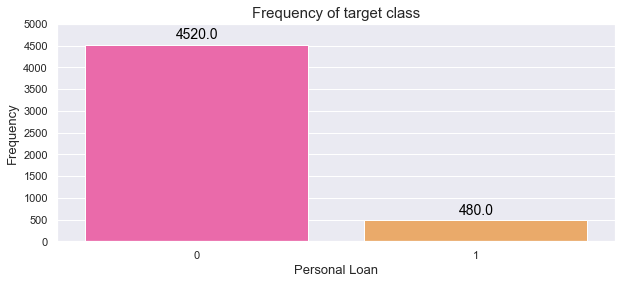

In [7]:
value_counts = loan_df["Personal Loan"].value_counts()
target_counts = pd.DataFrame({'Personal Loan': list(value_counts.index), 'value_count': value_counts})

plt.figure(figsize=(10,4))
g = sns.barplot(x='Personal Loan', y='value_count', data=target_counts, capsize=0.3, palette='spring')
g.set_title("Frequency of target class", fontsize=15)
g.set_xlabel("Personal Loan", fontsize=13)
g.set_ylabel("Frequency", fontsize=13)
g.set_yticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000])
for p in g.patches:
    g.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points', fontsize=14, color='black')

### Analysis

The number of data points for customers accept the personal loan offered are very low when compared to customers not accept the personal loan offered. This may affect the model.

### Distribution of target attribute - Box plot

Text(0.5, 1.0, 'Distribution of target variable')

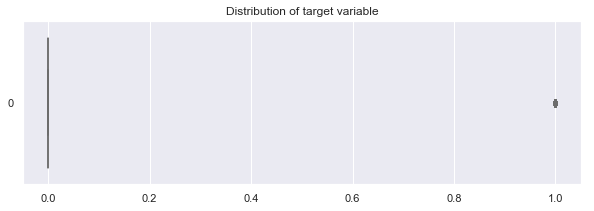

In [10]:
plt.figure(figsize=(10,3))
sns.boxplot(data=loan_df['Personal Loan'], orient='horizontal', palette='husl')
plt.title("Distribution of target variable")

In [11]:
# Number of Columns has null values

loan_df[loan_df.isnull().any(axis=1)]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [12]:
# Finding unique data
loan_df.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

### Describe Data

In [59]:
loan_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


It can be seen that the "Experience" variable has negative values, which could possibly mean some error in data. Hence we need to clean that data.
Also the mean of Experience is equals to median.

The feature ID does not add any interesting information. There is no association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction.

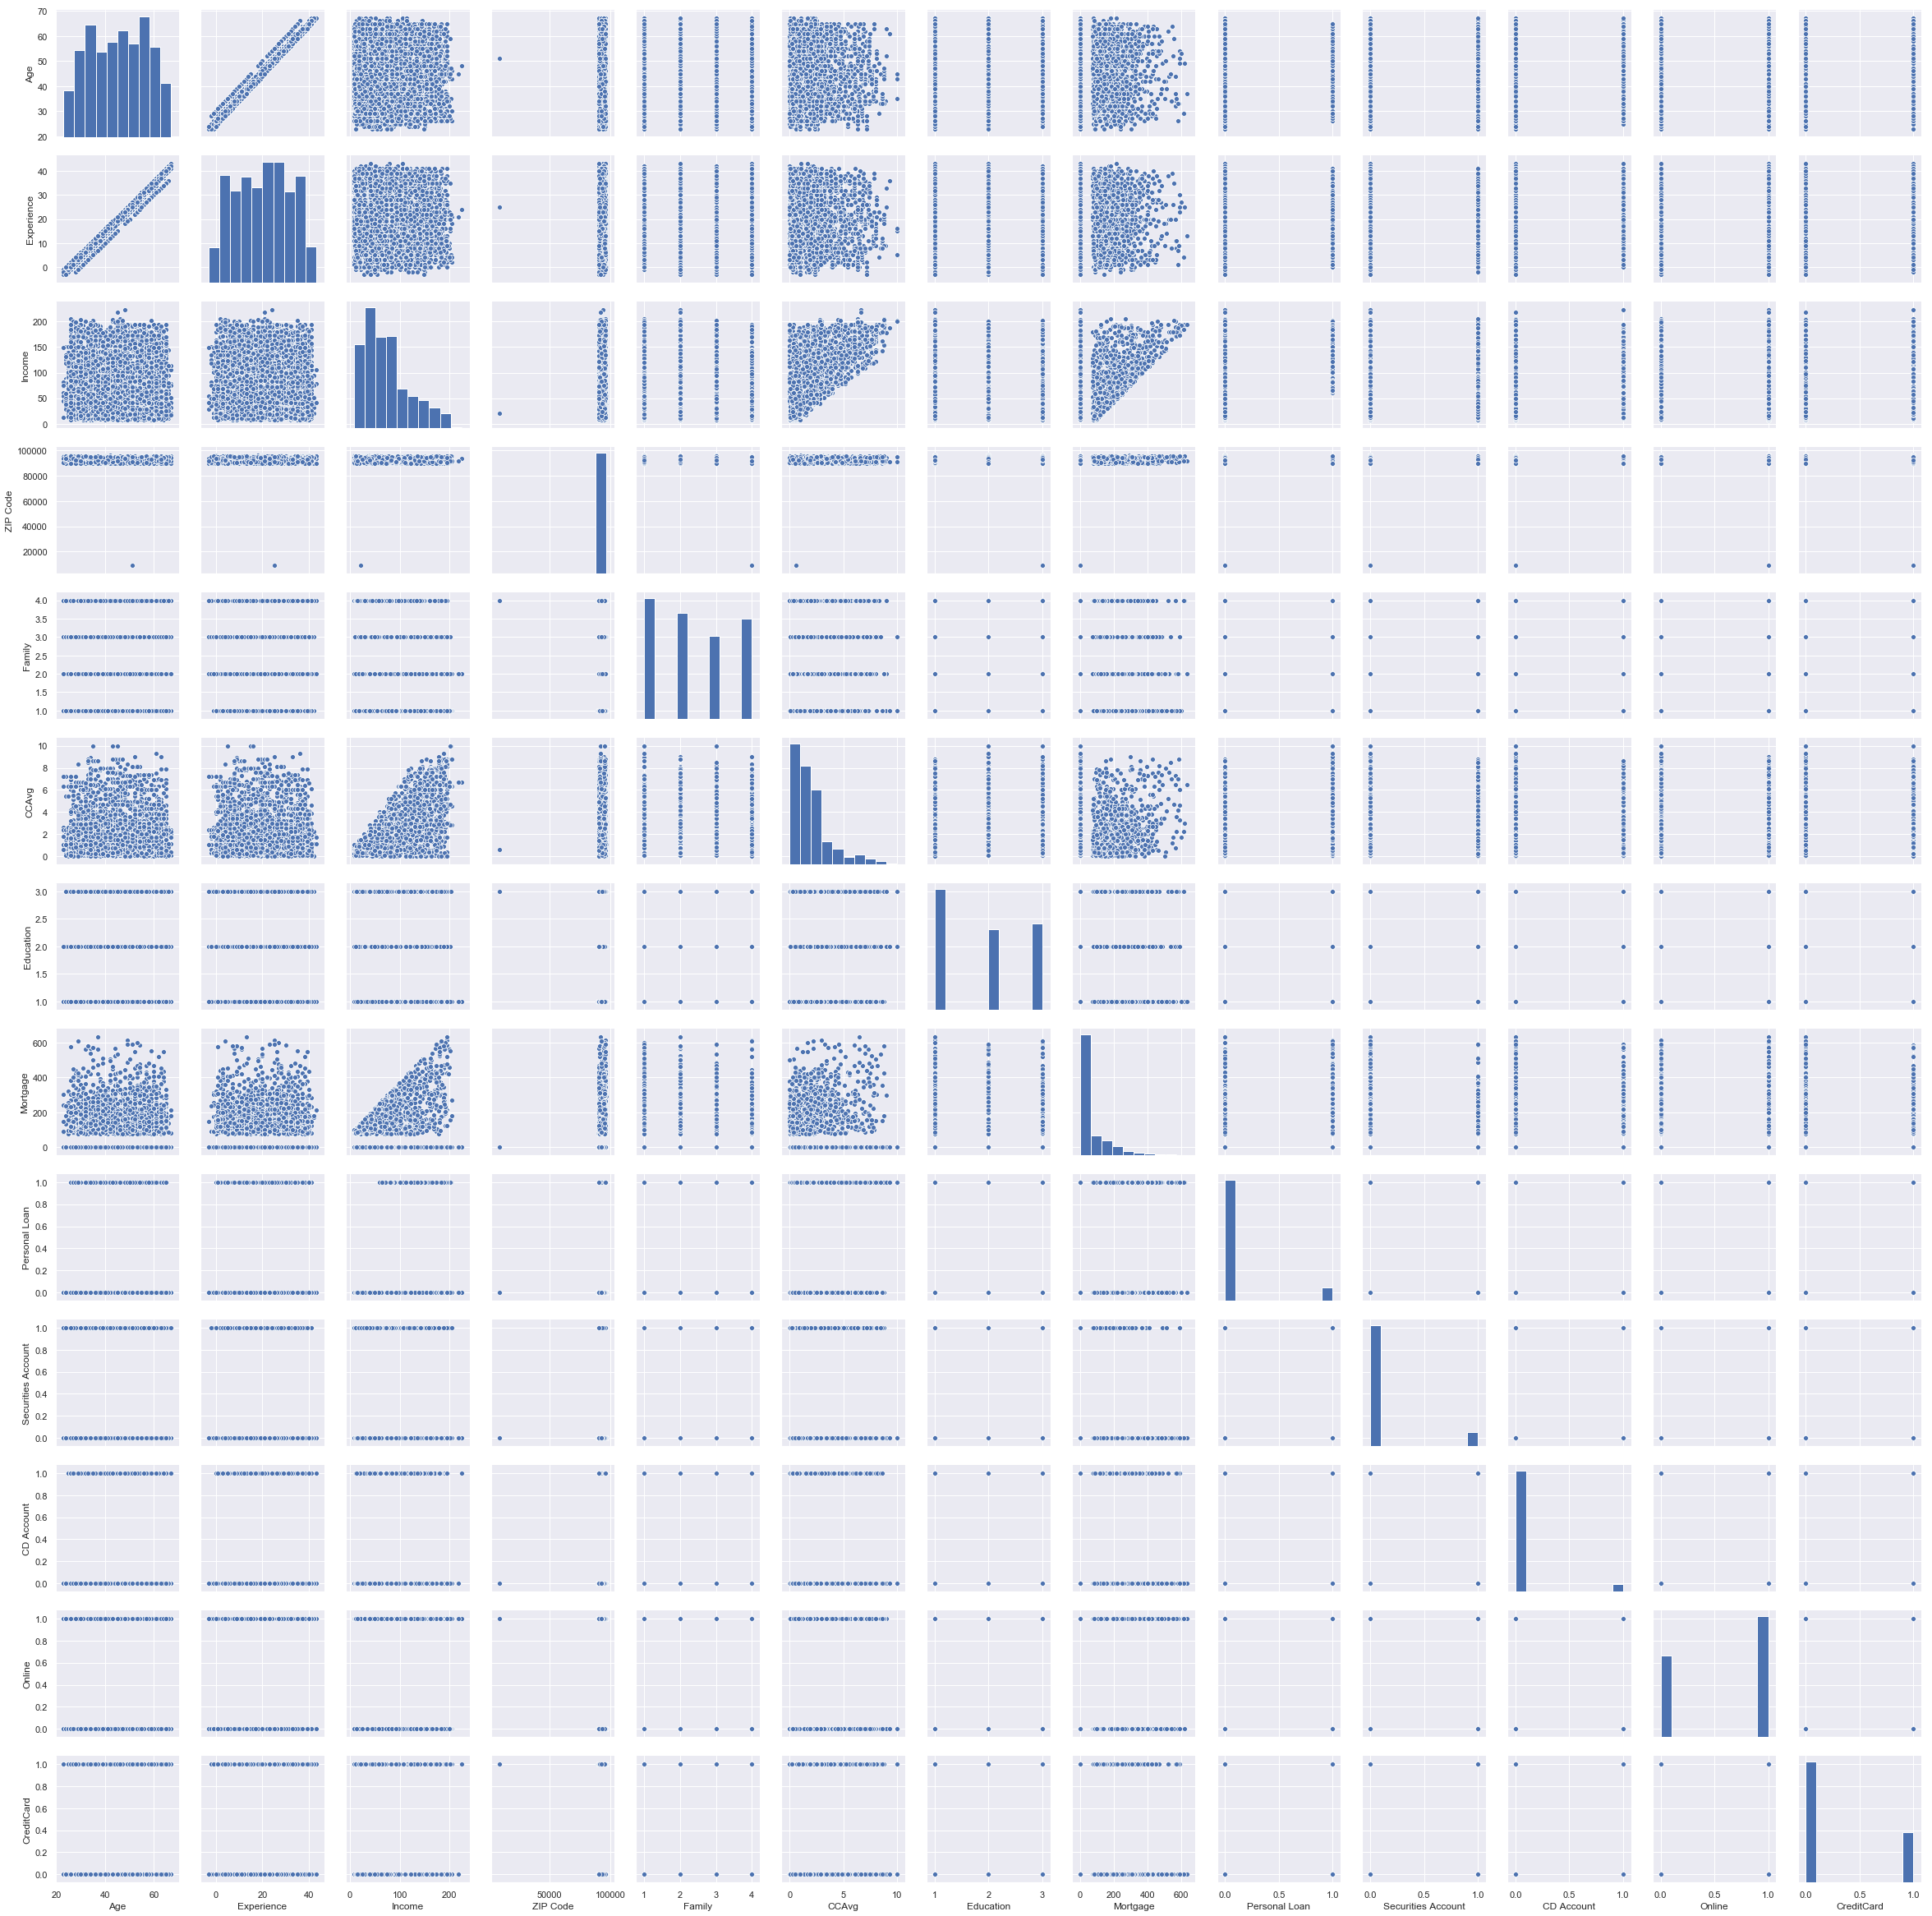

In [58]:
sns.pairplot(loan_df[['Age','Experience','Income','ZIP Code','Family','CCAvg' ,'Education' , 'Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard']])

Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median

Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median. 

Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median

CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K

Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K

The variables family and education are ordinal variables. The distribution of families is evenly distributes

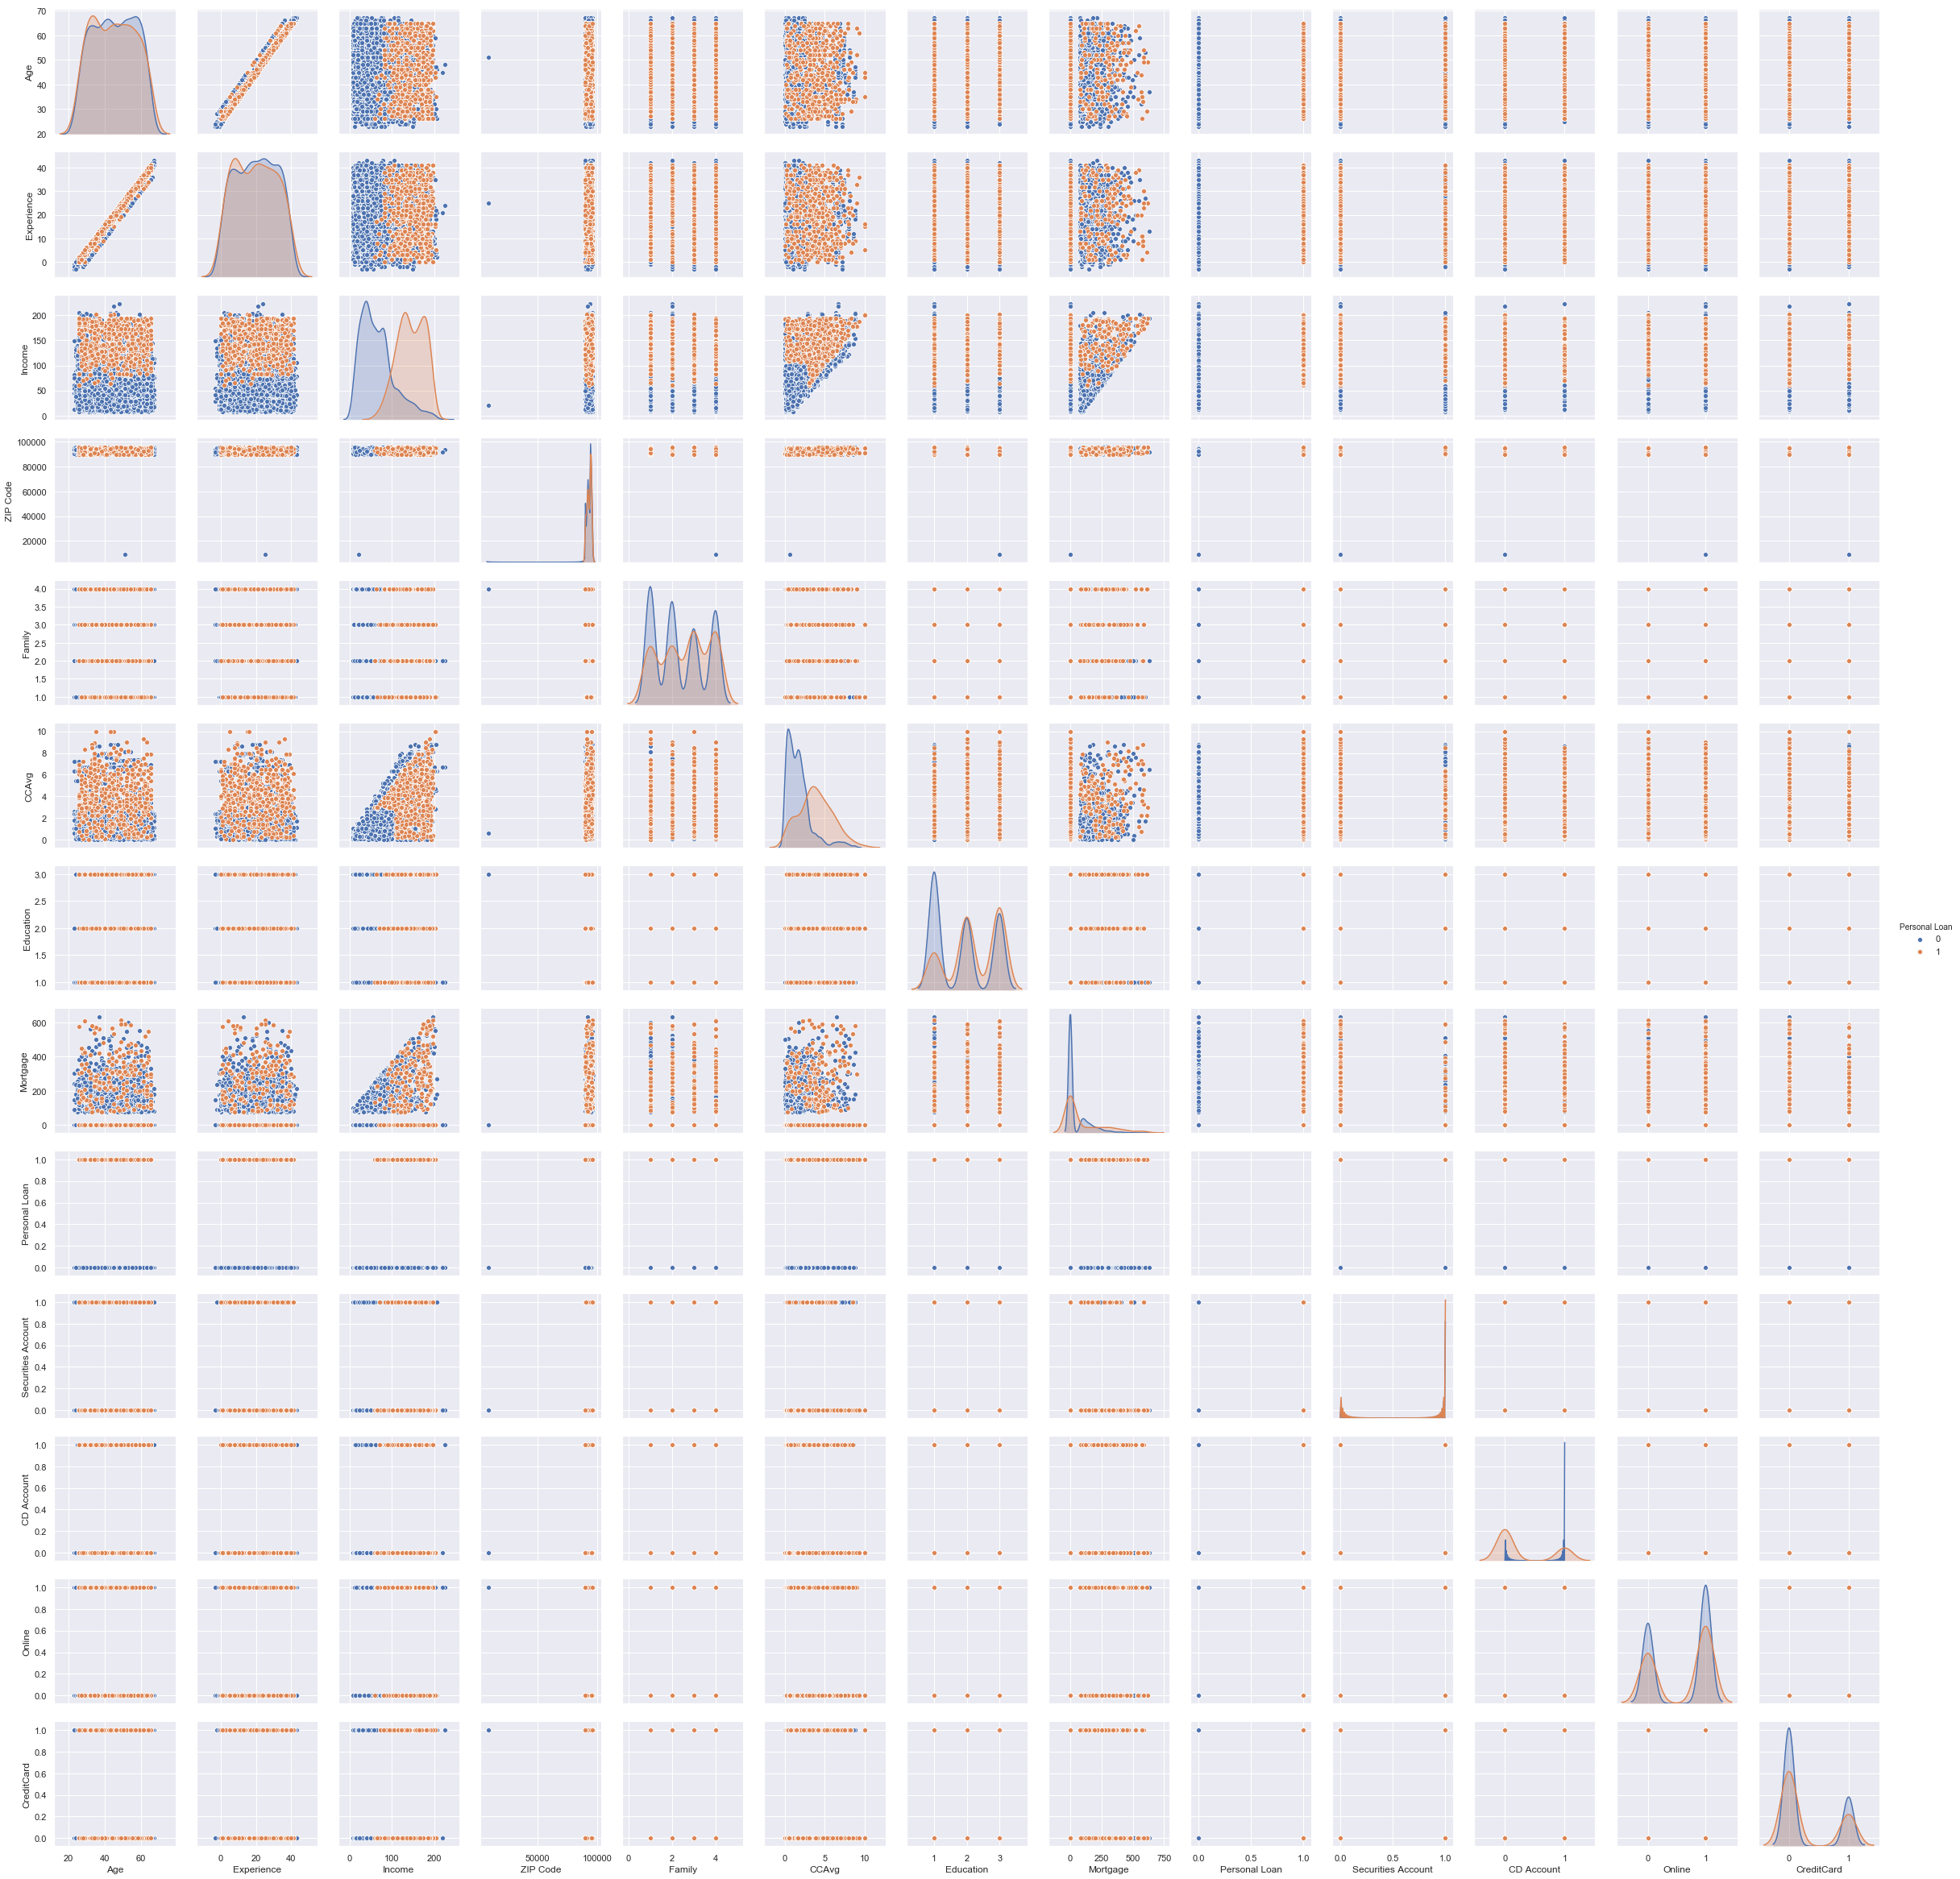

In [59]:
sns.pairplot(loan_df.iloc[:,1:], hue='Personal Loan')

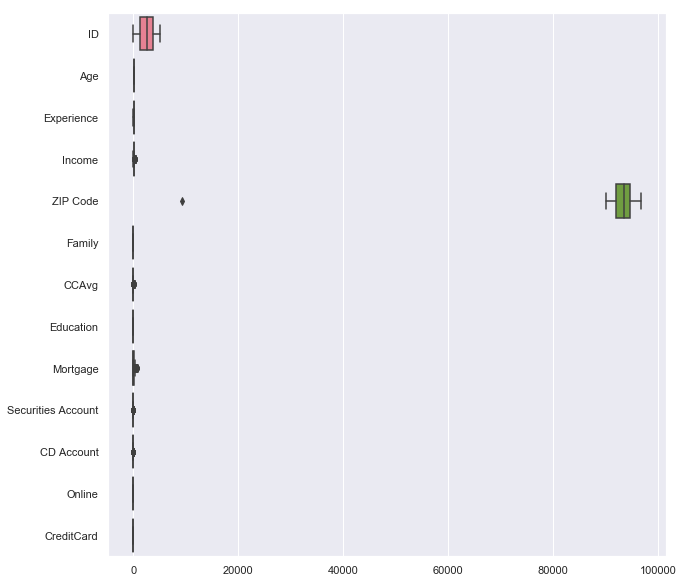

In [14]:
plt.figure(figsize=(10,10))
sns.boxplot(data=loan_df.drop(columns=['Personal Loan']), orient='horizontal', palette='husl')

In [60]:
# Find count of negative experience values

loan_df[loan_df['Experience'] < 0]['Experience'].count()

52

There are 52 records which have negative Experience values, we have to clean this data before proceeding further.

In [61]:
# Clean negative Variables
# Let take all postive Experience value into on data frame and all negative value into another data frame
posdfExp = loan_df[loan_df['Experience'] > 0]
negdfExp = loan_df['Experience'] < 0 # Store boolean values ie. Flase/True  negative values = True and Postive value = False
negdfExp1 = loan_df[loan_df['Experience'] < 0] # To verify the data, will not use this data frame any where
dflist = loan_df.loc[negdfExp]['ID'].tolist()

In [62]:
negdfExp.value_counts()


False    4948
True       52
Name: Experience, dtype: int64

In [63]:
# Find the median values by filtering the data based on Age and Education which are most relivent fields to calculate the Experience median values

for id in dflist:
    age = loan_df.loc[np.where(loan_df['ID'] == id)]['Age'].tolist()[0] # Take position zero which is the Age value
    education = loan_df.loc[np.where(loan_df['ID'] == id)]['Education'].tolist()[0] # Take position zero which is the Education value
    dfFiltered = posdfExp[(posdfExp['Age'] == age) & (posdfExp['Education'] == education)] # Get all the data which matches corresponding Age and Education feiled from Postive Experinece data frame
    exp = dfFiltered['Experience'].median() # Finding Median for the selected data points
    loan_df.loc[loan_df.loc[np.where(loan_df['ID'] == id)].index, 'Experience'] = exp #Replacing negative value with median 



In [65]:
loan_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4971.0,20.243211,11.359189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [68]:
# Verify is there still any negative values left
loan_df[loan_df['Experience'] < 0]['Experience'].count()
    

0

In [69]:
loan_df[loan_df.isnull().any(axis=1)]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
226,227,24,NaN,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,NaN,51,90630,3,0.30,3,0,0,0,0,1,0
524,525,24,NaN,75,93014,4,0.20,1,0,0,0,0,1,0
583,584,24,NaN,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,NaN,125,92835,2,7.20,1,0,0,1,0,0,1
670,671,23,NaN,61,92374,4,2.60,1,239,0,0,0,1,0
686,687,24,NaN,38,92612,4,0.60,2,0,0,0,0,1,0
793,794,24,NaN,150,94720,2,2.00,1,0,0,0,0,1,0
889,890,24,NaN,82,91103,2,1.60,3,0,0,0,0,1,1
909,910,23,NaN,149,91709,1,6.33,1,305,0,0,0,0,1


Further we observed that some value are not correctly update for Experience filed due to further data error, either we have to drop these rows or we need to fill these nan values with median again

Lets fill with median value again, as there are no negatives values any more

In [22]:
loan_df.median()

ID                     2500.5
Age                      45.0
Experience               20.0
Income                   64.0
ZIP Code              93437.0
Family                    2.0
CCAvg                     1.5
Education                 2.0
Mortgage                  0.0
Personal Loan             0.0
Securities Account        0.0
CD Account                0.0
Online                    1.0
CreditCard                0.0
dtype: float64

In [70]:
loan_df = loan_df.apply(lambda x:x.fillna(x.median()), axis=0)

In [71]:
# let check nan values filled correctly or not 
loan_df[loan_df.isnull().any(axis=1)]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [72]:
loan_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.241800,11.326208,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Lets see how the data distributed


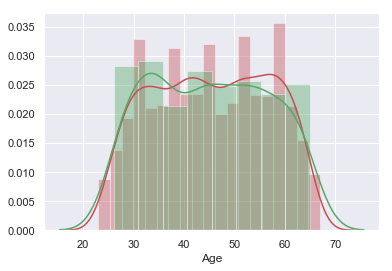

In [261]:
sns.distplot( loan_df[loan_df['Personal Loan'] == 0]['Age'], color = 'r')
sns.distplot( loan_df[loan_df['Personal Loan'] == 1]['Age'], color = 'g')

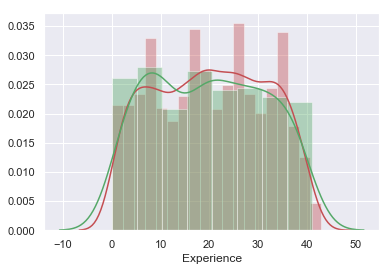

In [262]:
sns.distplot( loan_df[loan_df['Personal Loan'] == 0]['Experience'], color = 'r')
sns.distplot( loan_df[loan_df['Personal Loan'] == 1]['Experience'], color = 'g')

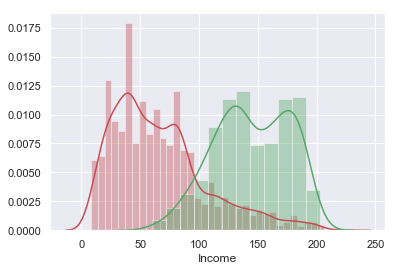

In [264]:
sns.distplot( loan_df[loan_df['Personal Loan'] == 0]['Income'], color = 'r')
sns.distplot( loan_df[loan_df['Personal Loan'] == 1]['Income'], color = 'g')

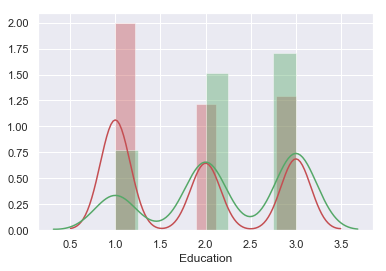

In [265]:
sns.distplot( loan_df[loan_df['Personal Loan'] == 0]['Education'], color = 'r')
sns.distplot( loan_df[loan_df['Personal Loan'] == 1]['Education'], color = 'g')

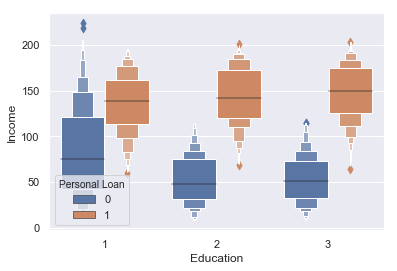

In [97]:
# Check how much personal loan dependent on Income and Education

sns.boxenplot(x='Education', y='Income', hue='Personal Loan', data=loan_df)

As per above plot we can say that customers whose Education level 1 has more income levels, 
however customers who taken the Personal Loan almost has same income levels.

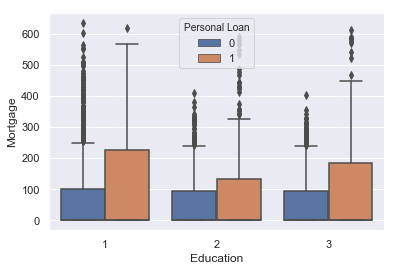

In [266]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=loan_df)

As per above plot we can say that customers who have Personal loans and the who does not opted for personal loans have high mortagae

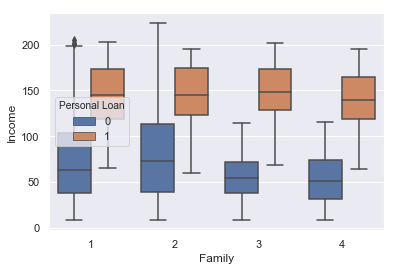

In [273]:
sns.boxplot(x="Family", y='Income', hue="Personal Loan", data=loan_df)

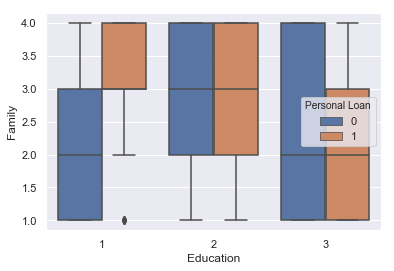

In [277]:
sns.boxplot(x="Education", y='Family', hue="Personal Loan", data=loan_df)

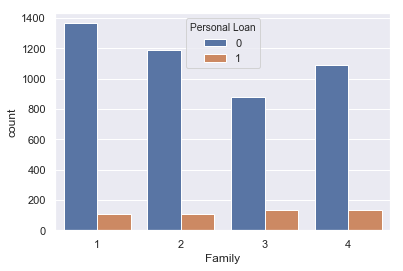

In [276]:
sns.countplot(x='Family',data=loan_df,hue='Personal Loan')

Family size does not have any impact in personal loan, but we can observe that family of size 3 are more likely to opted for loans.

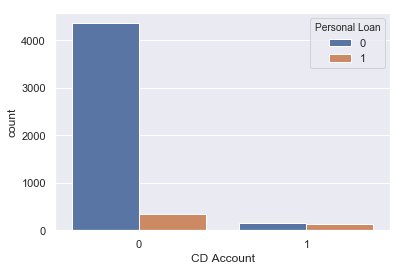

In [272]:
sns.countplot(x="CD Account", data=loan_df,hue="Personal Loan")

CD Account does not have any impact on personal loans as well

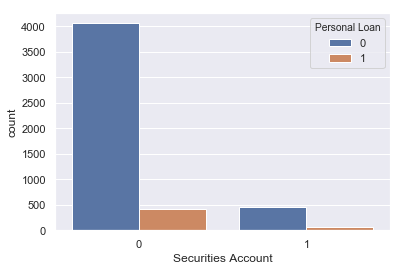

In [278]:
sns.countplot(x="Securities Account", data=loan_df,hue="Personal Loan")

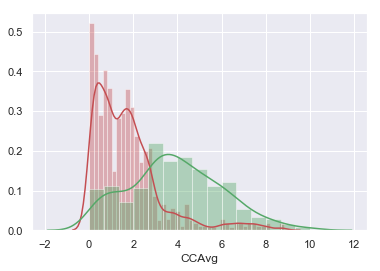

In [279]:
sns.distplot( loan_df[loan_df['Personal Loan'] == 0]['CCAvg'], color = 'r')
sns.distplot( loan_df[loan_df['Personal Loan'] == 1]['CCAvg'], color = 'g')

Customers who are opted for personal loans are having high Cerdit card Avg spends per month.

Text(0, 0.5, 'Age')

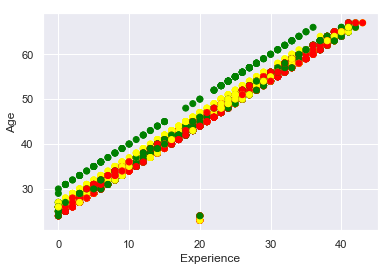

In [289]:
colors = {1:'red',2:'yellow',3:'green'}
plt.scatter(loan_df['Experience'],loan_df['Age'],c=loan_df['Education'].apply(lambda x:colors[x]))
plt.xlabel('Experience')
plt.ylabel('Age')

Above plot shows that experinece and age are having positive correlation, as increase age experinece also incresed. 

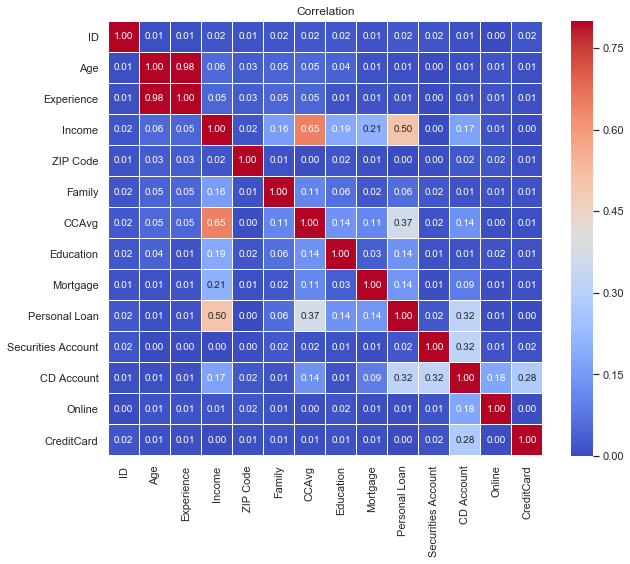

In [73]:
plt.figure(figsize=(10, 8))
sns.heatmap(loan_df.corr().abs(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01, cmap='coolwarm')
plt.title('Correlation')
plt.show()

From the above correlation chart, we can observe that

Correlation between Age and Experience is 0.98.

Correlation between Income and CCAvg is 0.65.

These are the pairs of features having high correlation i.e (>0.5)

Any ways we will not consider ID column.


### Distribution of each feature

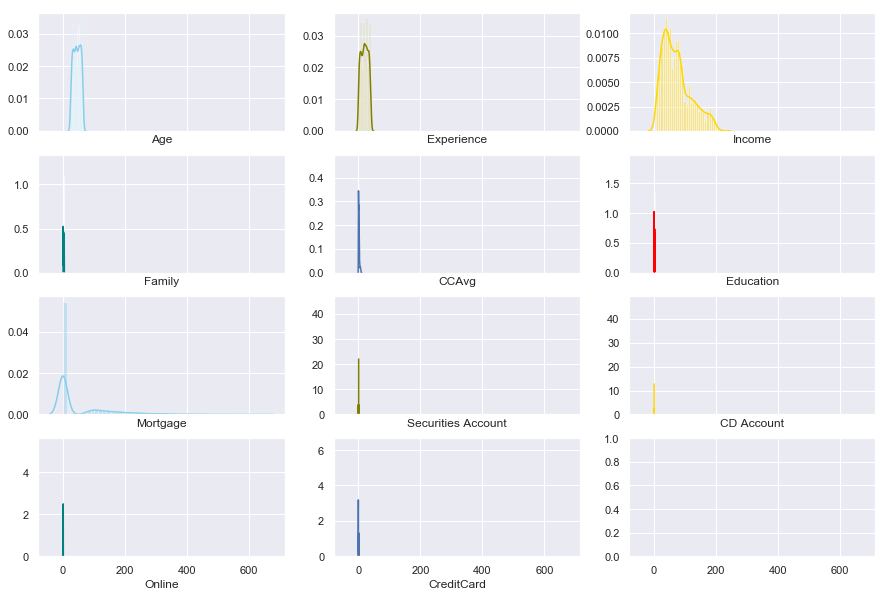

In [53]:
features = loan_df.copy(deep=True)
f, axes = plt.subplots(4, 3, figsize=(15, 10), sharex=True)
sns.distplot(features["Age"], rug=False, color="skyblue", ax=axes[0, 0])
sns.distplot(features["Experience"], rug=False, color="olive", ax=axes[0, 1])
sns.distplot(features["Income"], rug=False, color="gold", ax=axes[0, 2])
sns.distplot(features["Family"], rug=False, color="teal", ax=axes[1, 0])
sns.distplot(features["CCAvg"], rug=False, ax=axes[1, 1])
sns.distplot(features["Education"], rug=False, color="red", ax=axes[1, 2])
sns.distplot(features["Mortgage"], rug=False, color="skyblue", ax=axes[2, 0])
sns.distplot(features["Securities Account"], rug=False, color="olive", ax=axes[2, 1])
sns.distplot(features["CD Account"], rug=False, color="gold", ax=axes[2, 2])
sns.distplot(features["Online"], rug=False, color="teal", ax=axes[3, 0])
sns.distplot(features["CreditCard"], rug=False, ax=axes[3, 1])

### Split the data into training and test set in the ratio of 70:30 respectively

In [74]:
X = loan_df.drop(['ID','Experience','Personal Loan'], axis=1)
y = loan_df['Personal Loan']

In [75]:
X.columns

Index(['Age', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

### Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans

#### Logistic Regression Model

In [86]:
modelLog1 = LogisticRegression()
modelLog1.fit(X_train, y_train)

y_predict = modelLog1.predict(X_test)

t=list(X_train.columns)
coef_df = pd.DataFrame(modelLog1.coef_, columns= t)
coef_df['intercept'] = modelLog1.intercept_
print('Contribution of features toward target values:')
print(coef_df)

Contribution of features toward target values:
        Age    Income  ZIP Code    Family     CCAvg  Education  Mortgage  \
0  0.007155  0.037557 -0.000071  0.015505  0.005647   0.018257  0.000537   

   Securities Account  CD Account    Online  CreditCard  intercept  
0            0.001144    0.004903 -0.000517   -0.000134  -0.000084  


In [87]:
# Calculate score and print confusion Matrix

modelLog1_score = modelLog1.score(X_test, y_test)
print('Model score:')
print(modelLog1_score)
print('\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, y_predict))
print('\n')
print('Report:')
print(metrics.classification_report(y_test, y_predict))

Model score:
0.8993333333333333


Confusion Matrix:
[[1302   58]
 [  93   47]]


Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1360
           1       0.45      0.34      0.38       140

   micro avg       0.90      0.90      0.90      1500
   macro avg       0.69      0.65      0.66      1500
weighted avg       0.89      0.90      0.89      1500



Model Accuracy is 0.899 = 0.90

True Positive = 47

True Negative = 1302

False Positive = 58

False Negative = 93

##### Lets Apply scaled data to the Logestic training model

To check the effect to scaling on the loan dataset, lets create a seperate dataset with scaled values...
We can use scale or Z score function to scale the dataset

In [88]:
from sklearn import preprocessing

ZX = preprocessing.scale(X)
ZX_train, ZX_test, y_train, y_test = train_test_split(ZX, y, test_size=0.3, random_state=10)

In [89]:
modelLog2 = LogisticRegression()
modelLog2.fit(ZX_train, y_train)

y_predict = modelLog2.predict(ZX_test)

print('Contribution of features toward target values:')
coef_df = pd.DataFrame(modelLog2.coef_, columns= t)
coef_df['intercept'] = modelLog2.intercept_
print(coef_df)


Contribution of features toward target values:
        Age   Income  ZIP Code    Family     CCAvg  Education  Mortgage  \
0  0.091097  2.43813  -0.02636  0.758031  0.181394   1.338921  0.001545   

   Securities Account  CD Account    Online  CreditCard  intercept  
0           -0.209886    0.843772 -0.355392   -0.471615  -4.467691  


In [90]:
# Calculate score and print confusion Matrix

modelLog2_score = modelLog2.score(ZX_test, y_test)
print('Model score:')
print(modelLog2_score)
print('\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, y_predict))
print('\n')
print('Report:')
print(metrics.classification_report(y_test, y_predict))

Model score:
0.9526666666666667


Confusion Matrix:
[[1339   21]
 [  50   90]]


Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1360
           1       0.81      0.64      0.72       140

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.89      0.81      0.85      1500
weighted avg       0.95      0.95      0.95      1500



Model Accuracy is 0.95

True Positive = 90

True Negative = 1339

False Positive = 21

False Negative = 50

#### Naive Bayes model

In [44]:
modelNav1 = GaussianNB()
modelNav1.fit(X_train, y_train)
y_predict = modelNav1.predict(X_test)
modelNav1_score = modelNav1.score(X_test, y_test)

print('Model score:')
print(modelNav1_score)
print('\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, y_predict))
print('\n')
print('Report:')
print(metrics.classification_report(y_test, y_predict))

Model score:
0.886


Confusion Matrix:
[[1243  117]
 [  54   86]]


Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      1360
           1       0.42      0.61      0.50       140

   micro avg       0.89      0.89      0.89      1500
   macro avg       0.69      0.76      0.72      1500
weighted avg       0.91      0.89      0.90      1500



Model accuracy is 0.886

True Positives = 86

True Negatives = 1243

False Positives= 117

False Negatives= 54

#### Lets Apply scaled data to the Naive Bayes model

In [45]:
modelNav2 = GaussianNB()
modelNav2.fit(ZX_train, y_train)
y_predict = modelNav2.predict(ZX_test)

modelNav2_score = modelNav2.score(ZX_test, y_test)

print('Model score:')
print(modelNav2_score)
print('\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, y_predict))
print('\n')
print('Report:')
print(metrics.classification_report(y_test, y_predict))

Model score:
0.8786666666666667


Confusion Matrix:
[[1234  126]
 [  56   84]]


Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1360
           1       0.40      0.60      0.48       140

   micro avg       0.88      0.88      0.88      1500
   macro avg       0.68      0.75      0.71      1500
weighted avg       0.90      0.88      0.89      1500



Model accuracy decreases to 0.878

True Positives = 84

True Negatives = 1234

False Positives= 126

False Negatives= 56

### k-Nearest Neighbors (KNN)

In [47]:
NNH_1 = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )
NNH_1.fit(X_train, y_train)
y_predict = NNH_1.predict(X_test)

NNH_1_score = NNH_1.score(X_test, y_test)

print('Model score:')
print(NNH_1_score)
print('\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, y_predict))
print('\n')
print('Report:')
print(metrics.classification_report(y_test, y_predict))

Model score:
0.8813333333333333


Confusion Matrix:
[[1280   80]
 [  98   42]]


Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1360
           1       0.34      0.30      0.32       140

   micro avg       0.88      0.88      0.88      1500
   macro avg       0.64      0.62      0.63      1500
weighted avg       0.87      0.88      0.88      1500



Model accuracy is 0.881

True Positives = 42

True Negatives = 1280

False Positives= 80

False Negatives= 98

##### Let apply scaled data to k-Nearest Neighbors (KNN)

In [48]:
NNH_2 = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )
NNH_2.fit(ZX_train, y_train)
y_predict = NNH_2.predict(ZX_test)

NNH_2_score = NNH_2.score(ZX_test, y_test)

print('Model score:')
print(NNH_2_score)
print('\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, y_predict))
print('\n:')
print('Report:')
print(metrics.classification_report(y_test, y_predict))


Model score:
0.964


Confusion Matrix:
[[1352    8]
 [  46   94]]

:
Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1360
           1       0.92      0.67      0.78       140

   micro avg       0.96      0.96      0.96      1500
   macro avg       0.94      0.83      0.88      1500
weighted avg       0.96      0.96      0.96      1500



Model accuracy increases to 0.964

True Positives = 94

True Negatives = 1352

False Positives= 8

False Negatives= 46

# Model Comparision

In [49]:
print('Overall model accurecy before scaling:')
print('Logistic Regression:',modelLog1_score)
print('Naive Bayes:',modelNav1_score)
print('K-Nearest Neighbors:',NNH_1_score)
print('\n')
print('Overall Model Accuracy After scaling:')
print('Logistic Regression:',modelLog2_score)
print('Naive Bayes:',modelNav2_score)
print('K-Nearest Neighbors:',NNH_2_score)

Overall model accurecy before scaling:
Logistic Regression: 0.8993333333333333
Naive Bayes: 0.886
K-Nearest Neighbors: 0.8813333333333333


Overall Model Accuracy After scaling:
Logistic Regression: 0.9526666666666667
Naive Bayes: 0.8786666666666667
K-Nearest Neighbors: 0.964


We can see clearly K-Nearest Neighbors model with scaled data gives better accurecy which is 96.4%, hence K-Nearest Neighbors is best choice to predict the customers who will accept the personal loan.